# 第7章 : 分布と相関、ディストリビューション・リレーショナルプロット

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ペンギンズのデータセット読み込み

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


billはくちばし、flipperは翼、mmはミリメートル、gはグラム

In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# 欠損をもつレコード削除
df.dropna(axis=0, inplace=True)

In [8]:
df.shape

(333, 7)

In [9]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [10]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

## ディストリビューションプロット

In [12]:
# Seabornテーマ設定
sns.set_theme(context='talk', style='darkgrid', font='MS Mincho')

### ヒストプロット

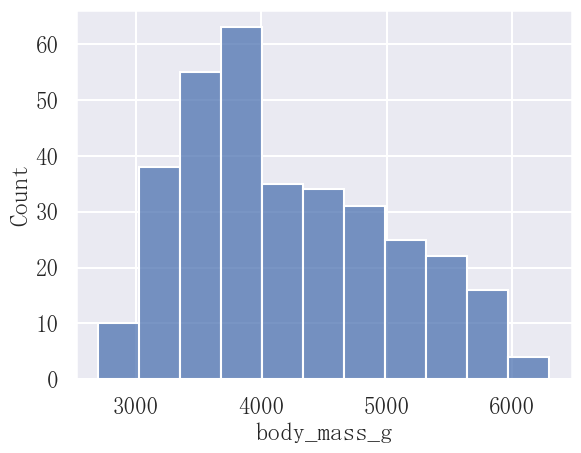

In [13]:
sns.histplot(data=df, x='body_mass_g')
plt.show()

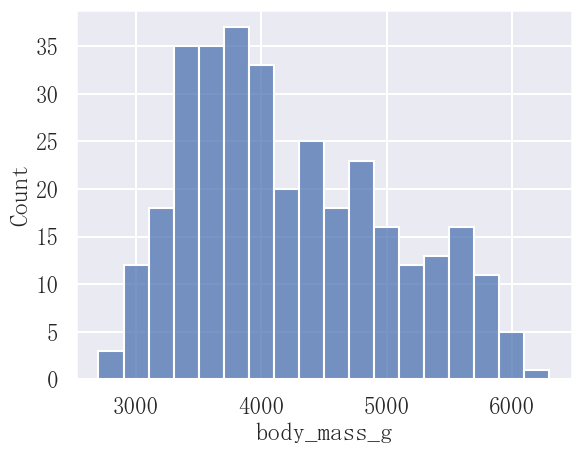

In [15]:
sns.histplot(data=df, x='body_mass_g', bins=18)
plt.show()

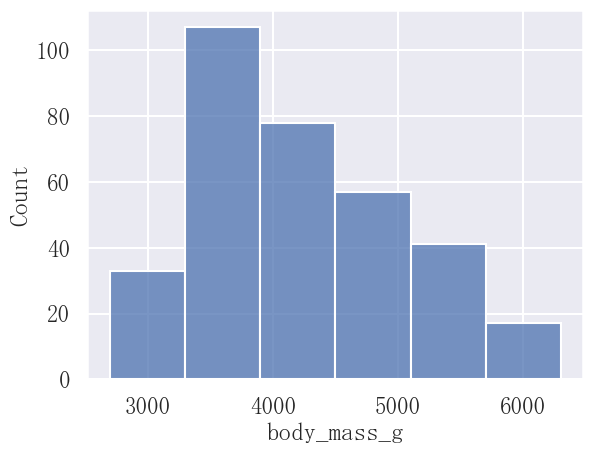

In [16]:
sns.histplot(data=df, x='body_mass_g', bins=6)
plt.show()

### hueの利用

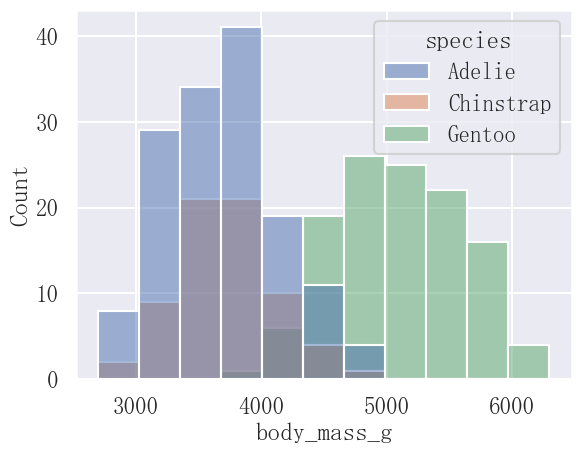

In [17]:
sns.histplot(data=df, x='body_mass_g', hue='species')
plt.show()

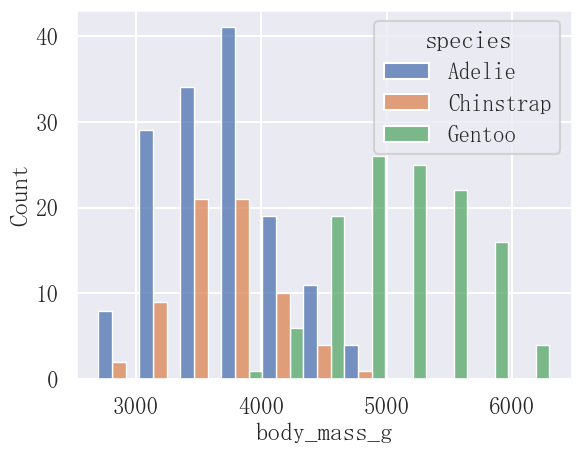

In [18]:
# binを分割
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='dodge')
plt.show()

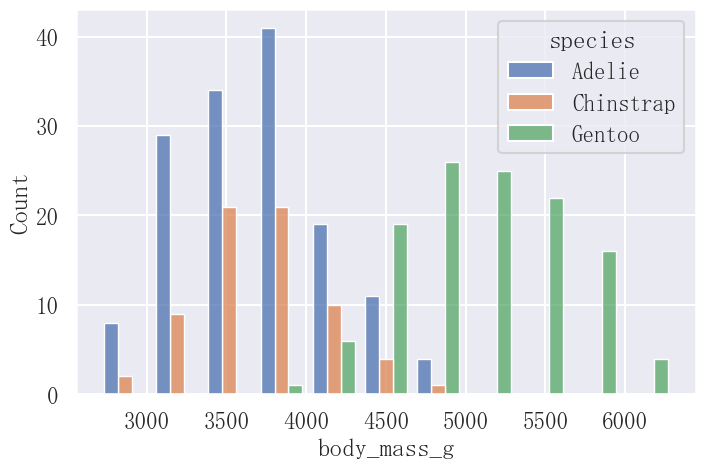

In [19]:
# サイズ調整
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='dodge', shrink=0.8)
plt.show()

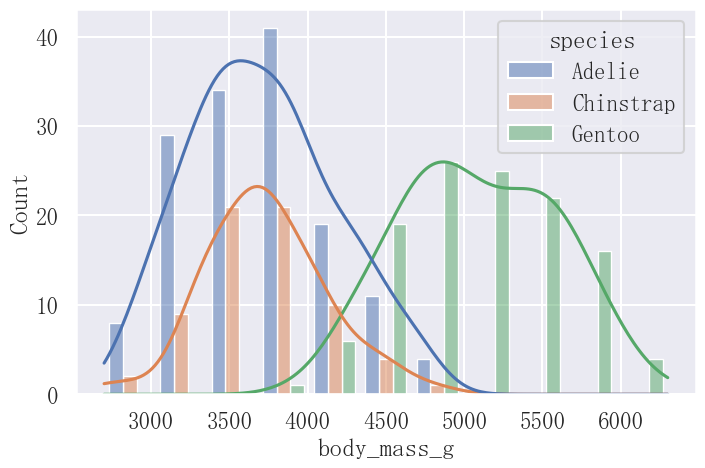

In [20]:
# KDE表示(Kernel Density Estimation : カーネル密度推定)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='dodge', shrink=0.8, kde=True)
plt.show()

multipleをいろいろ変更していく

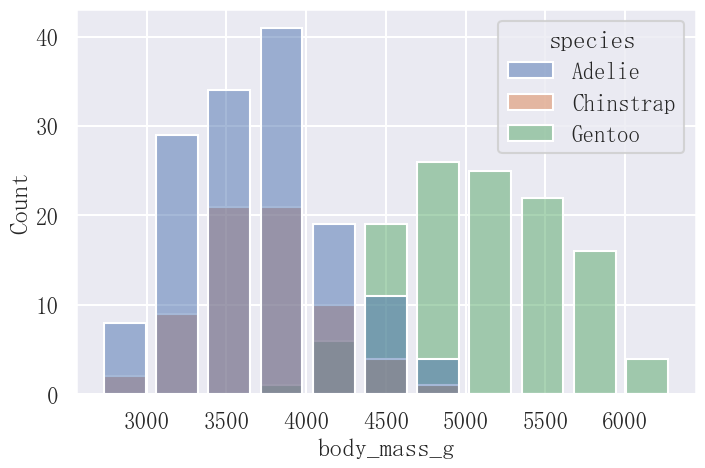

In [21]:
# multiple : layer (デフォルト)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='layer', shrink=0.8)
plt.show()

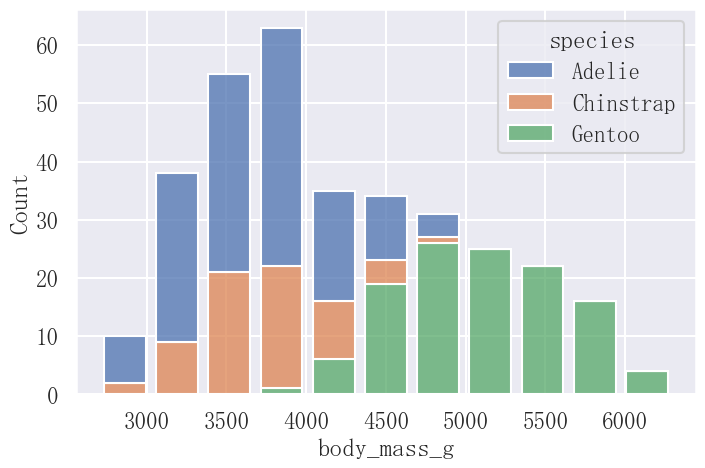

In [23]:
# multiple : stack (積み上げ)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='stack', shrink=0.8)
plt.show()

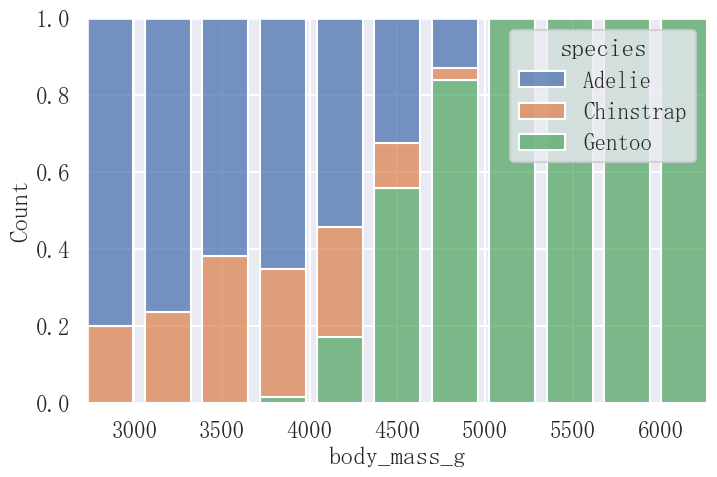

In [24]:
# multiple : fill (全数を1としてそれぞれの割合を表示)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='fill', shrink=0.8)
plt.show()

## リレーショナルプロット

### ジョイントプロット
スキャタープロット(散布図)とヒストプロットが同時に表示される

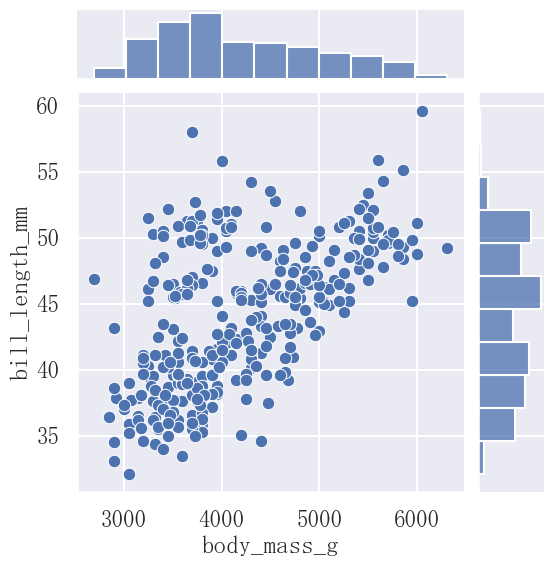

In [26]:
# 体重とくちばしの長さの関係
sns.jointplot(data=df, x='body_mass_g', y='bill_length_mm')

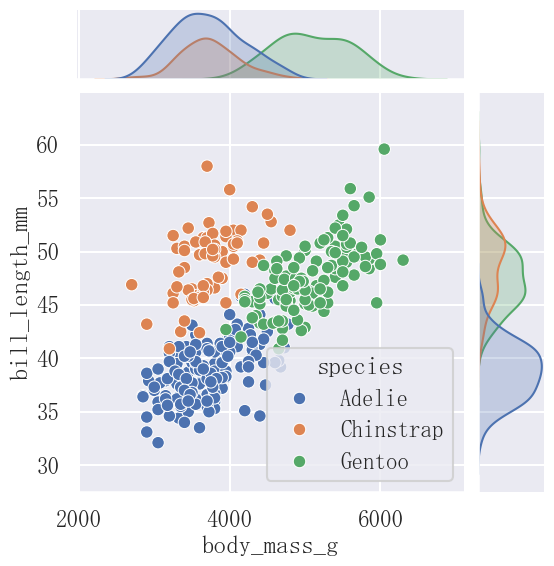

In [27]:
# hueの利用
sns.jointplot(data=df, x='body_mass_g', y='bill_length_mm', hue='species')
plt.show()

### スキャタープロット
散布図のこと

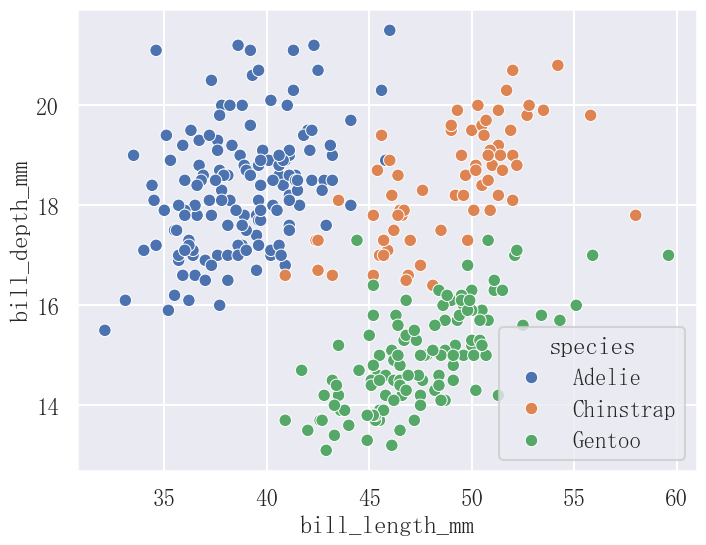

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

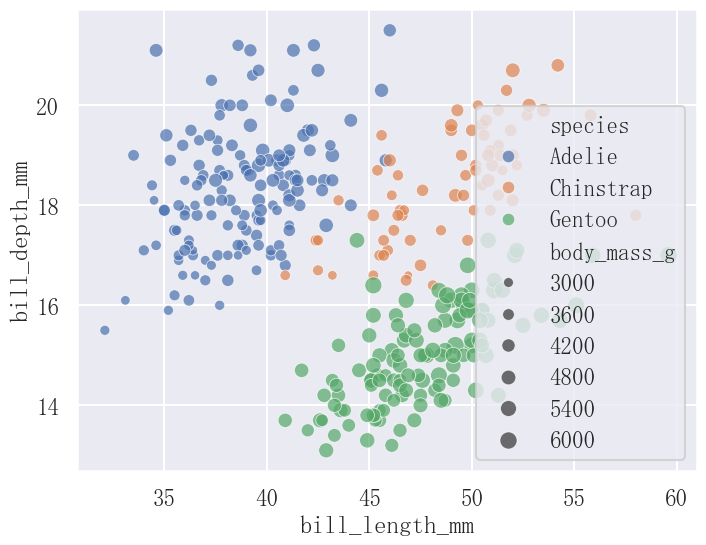

In [31]:
# alphaで透明度を設定できる
# 各プロットのサイズをsizeで設定できる(ここでは体重とする)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', alpha=0.7, size='body_mass_g')
plt.show()

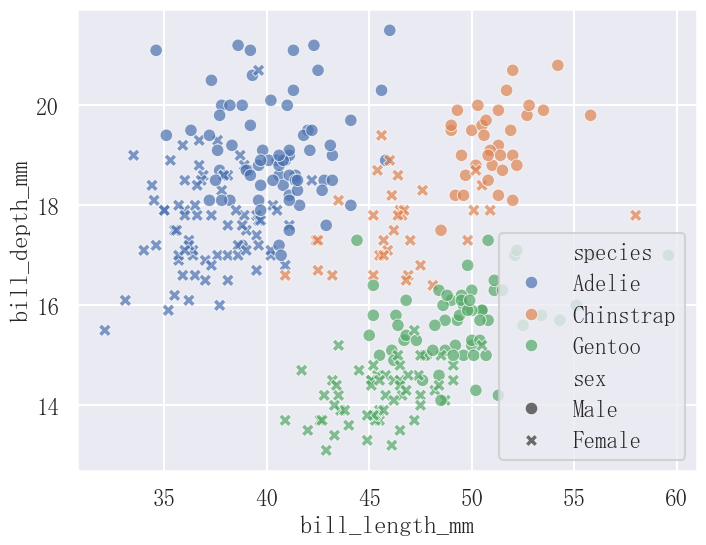

In [32]:
# styleを指定することでマーカーの違いによる可視化ができる(ここでは性別で分類してみる)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex', alpha=0.7)
plt.show()

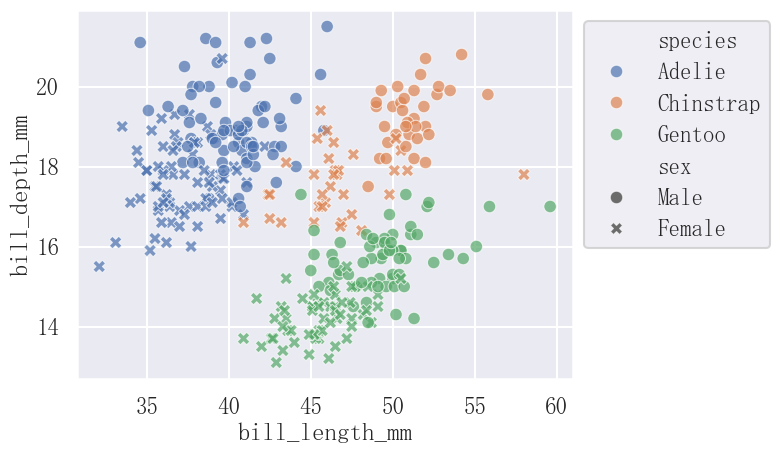

In [33]:
# legendの位置を変更してプロットをすべて見えるようにする
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex', alpha=0.7)
plt.legend(bbox_to_anchor=(1,1))
plt.show()